<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.130683,96.297697,23.633690,-0.000053,153.062016,153.061944,0.000072
1,0.0,1.0,20.629478,51.192610,91.085408,-0.000824,172.906672,172.907529,-0.000856
2,0.0,2.0,65.724411,29.930774,95.304226,0.001069,200.960480,200.958804,0.001676
3,0.0,3.0,71.484297,94.755075,91.941585,-0.000088,268.180868,268.181131,-0.000264
4,0.0,4.0,43.051340,30.796317,29.648833,0.001439,113.497930,113.495376,0.002553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,41.926498,47.880317,76.176355,0.000473,175.983643,175.983002,0.000641
19996,999.0,16.0,84.427796,43.910561,24.493642,0.000012,162.832011,162.831255,0.000755
19997,999.0,17.0,54.610499,53.326717,91.667883,0.000087,209.605185,209.605088,0.000097
19998,999.0,18.0,46.573662,96.288207,46.349038,-0.000204,199.210701,199.211085,-0.000384


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.130683,96.297697,23.633690,-0.000053,153.062016,153.061944,0.000072
1,0.0,1.0,20.629478,51.192610,91.085408,-0.000824,172.906672,172.907529,-0.000856
2,0.0,2.0,65.724411,29.930774,95.304226,0.001069,200.960480,200.958804,0.001676
3,0.0,3.0,71.484297,94.755075,91.941585,-0.000088,268.180868,268.181131,-0.000264
4,0.0,4.0,43.051340,30.796317,29.648833,0.001439,113.497930,113.495376,0.002553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,41.926498,47.880317,76.176355,0.000473,175.983643,175.983002,0.000641
19996,999.0,16.0,84.427796,43.910561,24.493642,0.000012,162.832011,162.831255,0.000755
19997,999.0,17.0,54.610499,53.326717,91.667883,0.000087,209.605185,209.605088,0.000097
19998,999.0,18.0,46.573662,96.288207,46.349038,-0.000204,199.210701,199.211085,-0.000384


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.130683  96.297697  23.633690 -0.000053  153.062016   
      1.0    20.629478  51.192610  91.085408 -0.000824  172.906672   
      2.0    65.724411  29.930774  95.304226  0.001069  200.960480   
      3.0    71.484297  94.755075  91.941585 -0.000088  268.180868   
      4.0    43.051340  30.796317  29.648833  0.001439  113.497930   
...                ...        ...        ...       ...         ...   
999.0 15.0   41.926498  47.880317  76.176355  0.000473  175.983643   
      16.0   84.427796  43.910561  24.493642  0.000012  162.832011   
      17.0   54.610499  53.326717  91.667883  0.000087  209.605185   
      18.0   46.573662  96.288207  46.349038 -0.000204  199.210701   
      19.0   97.875154  57.659553  48.613679  0.000570  214.148957   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.061944  0.000072  
      1.0    172.907529 -0.000856  
      2.0    200.958804  0.001676  
      3.0    268.181131 -0.000264  
      4.0    113.495376  0.002553  
...                 ...       ...  
999.0 15.0   175.983002  0.000641  
      16.0   162.831255  0.000755  
      17.0   209.605088  0.000097  
      18.0   199.211085 -0.000384  
      19.0   214.147970  0.000987  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.130683  96.297697  23.633690 -0.000053  153.062016   
      1.0    20.629478  51.192610  91.085408 -0.000824  172.906672   
      2.0    65.724411  29.930774  95.304226  0.001069  200.960480   
      3.0    71.484297  94.755075  91.941585 -0.000088  268.180868   
      4.0    43.051340  30.796317  29.648833  0.001439  113.497930   
...                ...        ...        ...       ...         ...   
999.0 15.0   41.926498  47.880317  76.176355  0.000473  175.983643   
      16.0   84.427796  43.910561  24.493642  0.000012  162.832011   
      17.0   54.610499  53.326717  91.667883  0.000087  209.605185   
      18.0   46.573662  96.288207  46.349038 -0.000204  199.210701   
      19.0   97.875154  57.659553  48.613679  0.000570  214.148957   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.061944  0.000072  
      1.0    172.907529 -0.000856  
      2.0    200.958804  0.001676  
      3.0    268.181131 -0.000264  
      4.0    113.495376  0.002553  
...                 ...       ...  
999.0 15.0   175.983002  0.000641  
      16.0   162.831255  0.000755  
      17.0   209.605088  0.000097  
      18.0   199.211085 -0.000384  
      19.0   214.147970  0.000987  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.130683,96.297697,23.633690,-0.000053,153.062016,153.061944,0.000072
1,0.0,1.0,20.629478,51.192610,91.085408,-0.000824,172.906672,172.907529,-0.000856
2,0.0,2.0,65.724411,29.930774,95.304226,0.001069,200.960480,200.958804,0.001676
3,0.0,3.0,71.484297,94.755075,91.941585,-0.000088,268.180868,268.181131,-0.000264
4,0.0,4.0,43.051340,30.796317,29.648833,0.001439,113.497930,113.495376,0.002553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,41.926498,47.880317,76.176355,0.000473,175.983643,175.983002,0.000641
19996,999.0,16.0,84.427796,43.910561,24.493642,0.000012,162.832011,162.831255,0.000755
19997,999.0,17.0,54.610499,53.326717,91.667883,0.000087,209.605185,209.605088,0.000097
19998,999.0,18.0,46.573662,96.288207,46.349038,-0.000204,199.210701,199.211085,-0.000384


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.130683  96.297697  23.633690 -0.000053  153.062016   
      1.0    20.629478  51.192610  91.085408 -0.000824  172.906672   
      2.0    65.724411  29.930774  95.304226  0.001069  200.960480   
      3.0    71.484297  94.755075  91.941585 -0.000088  268.180868   
      4.0    43.051340  30.796317  29.648833  0.001439  113.497930   
...                ...        ...        ...       ...         ...   
999.0 15.0   41.926498  47.880317  76.176355  0.000473  175.983643   
      16.0   84.427796  43.910561  24.493642  0.000012  162.832011   
      17.0   54.610499  53.326717  91.667883  0.000087  209.605185   
      18.0   46.573662  96.288207  46.349038 -0.000204  199.210701   
      19.0   97.875154  57.659553  48.613679  0.000570  214.148957   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.061944  0.000072  
      1.0    172.907529 -0.000856  
      2.0    200.958804  0.001676  
      3.0    268.181131 -0.000264  
      4.0    113.495376  0.002553  
...                 ...       ...  
999.0 15.0   175.983002  0.000641  
      16.0   162.831255  0.000755  
      17.0   209.605088  0.000097  
      18.0   199.211085 -0.000384  
      19.0   214.147970  0.000987  

[20000 rows x 7 columns]

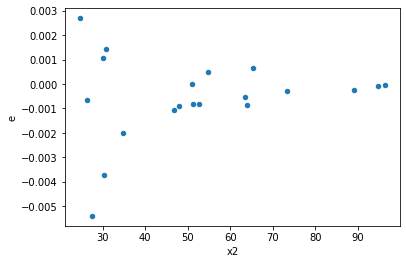

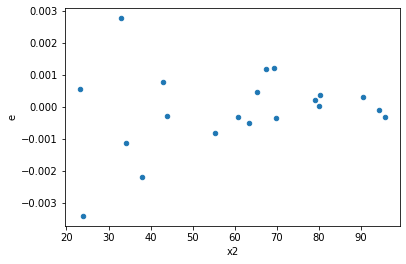

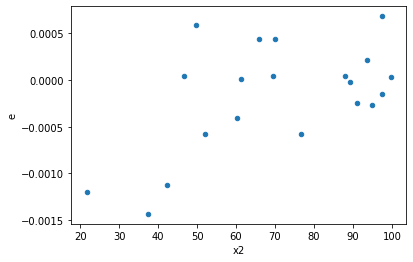

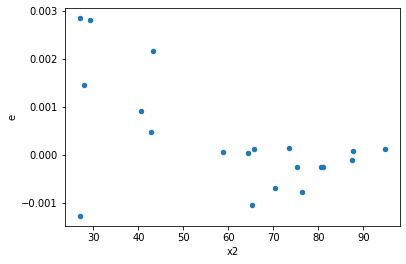

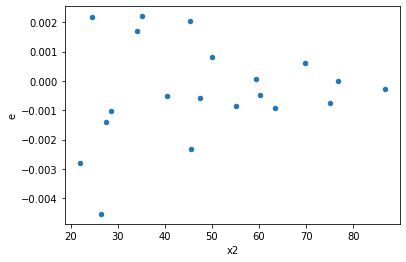

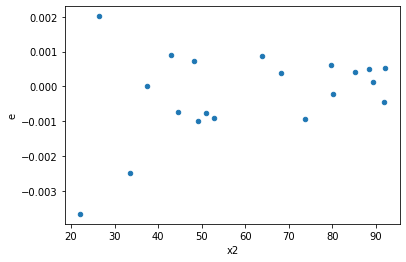

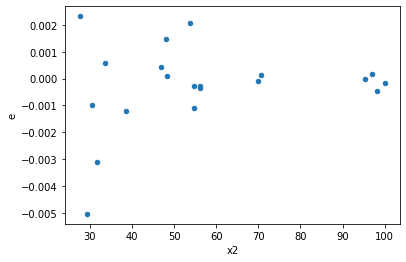

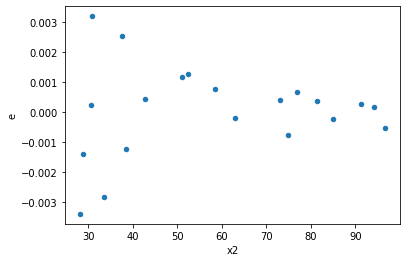

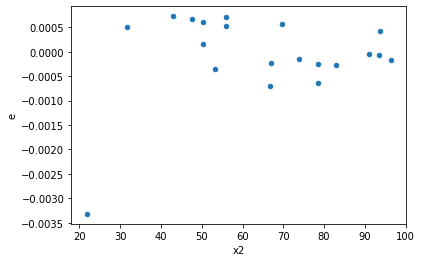

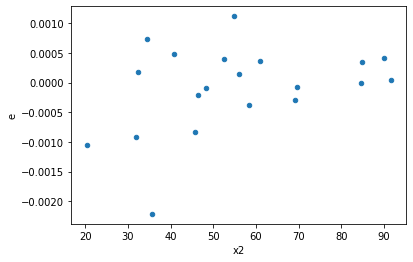

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,1.206440396684006e-05,2.6778356149771408e-05,2.412880793368012e-06,5.355671229954282e-06,2.219617000837652,0.40204444235788483,0.7989777788210576,0.20102222117894242,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,1.2947288599326435e-06,2.897418272103519e-06,2.5894577198652867e-07,5.794836544207038e-07,2.2378571774898517,0.3973462757840396,0.8013268621079802,0.1986731378920198,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.327332828858043e-06,6.104690099906896e-06,4.6546656577160856e-07,1.2209380199813791e-06,2.6230412875249547,0.3134451823552469,0.8432774088223766,0.15672259117762344,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7.049797538697618e-07,1.0081129390693912e-06,1.4099595077395235e-07,2.0162258781387824e-07,1.429988497592557,0.7042797767173359,0.6478601116413321,0.35213988835866794,Reject001=1 : Homoscedasticity
20.0,5.0,5.0,8.601598110599574e-07,2.152056391749157e-06,1.7203196221199147e-07,4.304112783498314e-07,2.501926228217082,0.3369748517177986,0.8315125741411007,0.1684874258588993,Reject001=1 : Homoscedasticity
26.0,5.0,5.0,1.9702746137649556e-06,1.2436158487655267e-05,3.9405492275299114e-07,2.4872316975310534e-06,6.311890941888185,0.06444044148440531,0.9677797792577973,0.032220220742202654,Reject001=1 : Homoscedasticity
29.0,5.0,5.0,2.8050431080051626e-06,7.60973514718072e-06,5.610086216010325e-07,1.521947029436144e-06,2.7128763638119158,0.2974245967991396,0.8512877016004302,0.1487122983995698,Reject001=1 : Homoscedasticity
64.0,5.0,5.0,1.175435657624559e-07,2.211250138253121e-06,2.350871315249118e-08,4.422500276506242e-07,18.812175076616633,0.005885704898044963,0.9970571475509775,0.0029428524490224817,Reject001=0 : Heteroscedasticity
71.0,5.0,5.0,1.3586459500291286e-06,3.3264921126569283e-06,2.717291900058257e-07,6.652984225313857e-07,2.448387758845938,0.3481489249939176,0.8259255375030412,0.1740744624969588,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.206440396684006e-05,2.6778356149771408e-05,2.412880793368012e-06,5.355671229954282e-06,2.219617000837652,0.40204444235788483,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1.1843968373543928e-05,2.6016904603618683e-06,2.3687936747087855e-06,5.203380920723737e-07,0.2196637459935564,0.12173953059421042,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,1.4519183450658797e-06,8.865917080072427e-07,2.903836690131759e-07,1.7731834160144852e-07,0.610634689629887,0.6014847299166869,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,1.2947288599326435e-06,2.897418272103519e-06,2.5894577198652867e-07,5.794836544207038e-07,2.2378571774898517,0.3973462757840396,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1.984021816445551e-05,1.3189982733566108e-05,3.968043632891101e-06,2.6379965467132216e-06,0.6648103677204747,0.6650834363269739,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,1.6223871586603707e-06,1.1232129826020708e-06,3.2447743173207417e-07,2.2464259652041416e-07,0.6923211741453406,0.6964275526226522,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1.4893977788981346e-05,1.4119831610109644e-06,2.9787955577962695e-06,2.823966322021929e-07,0.09480228727449547,0.02178744512194869,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.327332828858043e-06,6.104690099906896e-06,4.6546656577160856e-07,1.2209380199813791e-06,2.6230412875249547,0.3134451823552469,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7.049797538697618e-07,1.0081129390693912e-06,1.4099595077395235e-07,2.0162258781387824e-07,1.429988497592557,0.7042797767173359,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      689
Reject001=0 : Heteroscedasticity    311
Name: Result_test, dtype: int64